# 第2章 感知机

二分类模型

$f(x) = sign(w*x + b)$

损失函数 $L(w, b) = -\Sigma{y_{i}(w*x_{i} + b)}$

---
#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

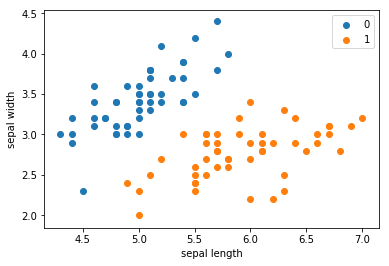

In [6]:
# plot dataset
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [0]:
# 将df前100行的第一二及最后一列作为数据集
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [8]:
X.shape

(100, 2)

In [9]:
y.shape

(100,)

## Perceptron

In [0]:
# 原始形式 2.1
class PLA:
    def __init__(self, max_iter=1000):
        self.b = 0
        self.lr = 0.1
        self.max_iter = max_iter
        self.iter = 0
        
    def sign(self, x, w, b):
        return np.dot(x, w) + b
    
    def fit(self, X, y):
        N, M = X.shape
        self.w = np.ones(M)
        wrong_items = N # 初始错误样本个数为N,迭代到没有错误样本为止
        print("fitting...")
        while(wrong_items):
            self.iter += 1
            if self.iter > self.max_iter: # 超出最大迭代次数，结束
                break
            wrong_items = 0
            for i in range(N):
                if y[i] * self.sign(X[i], self.w, self.b) <= 0:
                    self.w += self.lr * np.dot(y[i], X[i])
                    self.b += self.lr * y[i]
                    wrong_items += 1
            if wrong_items == 0:
                print("finished at iters: {}, w: {}, b: {}".format(min(self.max_iter, self.iter), self.w, self.b))

In [11]:
perceptron = PLA()
perceptron.fit(X, y)

fitting...
finished at iters: 679, w: [  7.8 -10. ], b: -12.099999999999973


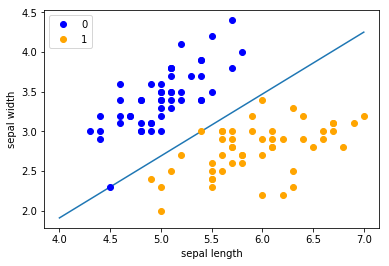

In [12]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn Perceptron

In [0]:
from sklearn.linear_model import Perceptron

In [27]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=False, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
# Weights assigned to the features.
clf.coef_

array([[ 28.7, -37.2]])

In [16]:
# 截距 Constants in decision function.
clf.intercept_

array([-11.])

In [28]:
clf.n_iter_

27

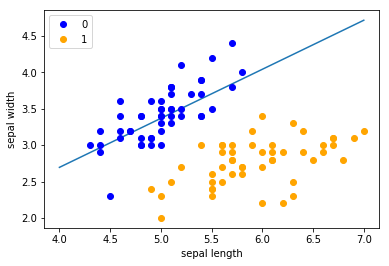

In [29]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [20]:
clf.score(X, y)

0.64